# Import

In [1]:
import numpy as np
import pandas as pd
from Bio import SeqIO

import torchvision.transforms as transforms

from torch.utils.data import DataLoader,Dataset
from torchvision import datasets
from torch.autograd import Variable 

import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.autograd import Variable
import torch.autograd as autograd

from pathlib import Path
import wandb

import time
_wandb = True

Сделать ваасермановский лосс
Разобраться с dimm - что ето?

In [121]:
if _wandb:
    wandb.login()
    wandb.init(
        # set the wandb project where this run will be logged
        project="GAN-Z",
        
        # track hyperparameters and run metadata
        config={
        "learning_rate": 0.02,
        "architecture": "GAN",
        "dataset": "chr1",
        "epochs": 300,
        }

    )


In [2]:
cuda = True if torch.cuda.is_available() else False # GPU Setting

# Setting parametrs

In [3]:
generic = False # Generate generic data on the fly (ignores data_loc and data_start args)
data_loc = Path("./data/") # Data location
epoch = 300
disc_iters = 5 # Number of iterations to train discriminator for at each epoch
latent_dim = 5 # Size of latent space
gen_dim = 100 # Generator dimension parameter
disc_dim = 100 # Discriminator dimension parameter
gen_layers = 5
disc_layer = 5
batch_size = 100
max_seq_len = 1000

 gen_data = lib.models.resnet_generator(latent_vars, args.gen_dim, args.max_seq_len, data_enc_dim, args.annotate)
  data_enc_dim = 4

# Preparing DATASET

In [4]:
def ohe_DNA(part):
    seq = []
    for i in part:
        match i:
                case 0:
                    seq.append([1,0,0,0,0])
                case 1:
                    seq.append([0,1,0,0,0])
                case 2:
                    seq.append([0,0,1,0,0])
                case 3:
                    seq.append([0,0,0,1,0])
                case 4:
                    seq.append([0,0,0,0,1])
    return seq

In [56]:
def reverse_ohe_DNA(part):
    seq = []
    for i in part:
        match i:
                case [1,0,0,0,0]:
                    seq.append(0)
                case [0,1,0,0,0]:
                    seq.append(1)
                case [0,0,1,0,0]:
                    seq.append(2)
                case [0,0,0,1,0]:
                    seq.append(3)
                case [0,0,0,0,1]:
                    seq.append(4)
    return seq

In [61]:
reverse_ohe_DNA(GenData[0].tolist())

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [51]:
o = reverse_ohe_DNA(GenData[0])

tensor([0., 0., 0., 0., 1.])


In [55]:
o.numpy() == [1,0,0,0,1]

array([False,  True,  True,  True,  True])

In [42]:
GenData[0]

tensor([[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]])

In [17]:
noise = Variable(torch.randn((1,1000))).cuda()
out = generator(noise)

C:\Temp\ipykernel_13088\752960707.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


In [23]:
np.argmax(generator(noise).detach().cpu().numpy(),0)

C:\Temp\ipykernel_13088\752960707.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


array([3, 2, 0, 3, 2, 0, 0, 3, 2, 1, 0, 3, 3, 1, 0, 2, 3, 3, 1, 0, 0, 3,
       3, 0, 0, 3, 2, 0, 3, 2, 1, 3, 2, 1, 3, 2, 0, 3, 2, 1, 0, 0, 3, 2,
       1, 0, 2, 0, 1, 0, 1, 3, 2, 0, 3, 3, 0, 0, 3, 1, 1, 0, 3, 2, 1, 3,
       2, 0, 3, 2, 1, 0, 2, 3, 3, 1, 0, 0, 3, 2, 1, 0, 2, 3, 3, 2, 0, 3,
       2, 1, 0, 3, 1, 1, 0, 2, 1, 3, 1, 0, 0, 2, 3, 3, 1, 0, 0, 3, 1, 1,
       0, 0, 3, 2, 0, 0, 3, 1, 1, 0, 2, 0, 1, 0, 0, 3, 2, 1, 0, 0, 3, 2,
       1, 3, 2, 1, 3, 1, 3, 1, 0, 3, 3, 1, 0, 3, 2, 1, 3, 1, 0, 2, 1, 3,
       2, 0, 3, 2, 1, 0, 2, 3, 1, 1, 0, 0, 3, 1, 0, 0, 3, 2, 0, 3, 2, 1,
       3, 2, 1, 0, 0, 3, 2, 1, 0, 3, 3, 2, 0, 3, 2, 0, 0, 3, 2, 1, 3, 2,
       1, 0, 3, 3, 2, 0, 3, 3, 1, 0, 0, 3, 3, 1, 0, 3, 2, 1, 0, 2, 3, 3,
       1, 1, 0, 2, 3, 2, 0, 3, 2, 1, 3, 2, 0, 3, 2, 1, 3, 2, 0, 3, 2, 0,
       3, 2, 1, 0, 2, 3, 2, 0, 3, 3, 1, 0, 0, 3, 2, 0, 3, 2, 1, 0, 0, 3,
       2, 0, 3, 2, 1, 3, 2, 0, 3, 2, 1, 3, 1, 0, 0, 3, 2, 0, 0, 3, 2, 1,
       0, 3, 3, 1, 0, 3, 2, 1, 3, 2, 0, 3, 3, 1, 1,

In [6]:
dna_vocab = {"A":0,
             "C":1,
             "G":2,
             "T":3,
             "N":4} # catch-all auxiliary token

class GenomicData(Dataset):
    def __init__(self, path, seq_len):
        self.seq_len = seq_len
        with open(path) as fasta_file:  # Will close handle cleanly
            seq_record = {}
            seq_record["lengths"] = []
            seq_record["seq"] = []

            for seq_rec in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
                seq_record["lengths"].append(len(seq_rec.seq))
                seq_record["seq"].append(seq_rec.seq)
        self.len = int(seq_record["lengths"][0])
        self.coded_seq = []
        for one in list(seq_record["seq"][0]):
            try:
                self.coded_seq.append(dna_vocab[one.upper()])
            except:
                print(one)

    def __len__(self):
        return int(self.len/self.seq_len)#int(np.round((self.len - self.seq_len)/100))
    
    def __getitem__(self, idx):
        return torch.Tensor(ohe_DNA(self.coded_seq[idx* self.seq_len:(idx+1)*self.seq_len]))


GenData = GenomicData("./data/chr1.fa", max_seq_len)

In [8]:
GenData[1].shape

torch.Size([1000, 5])

# Structure of NNs

6 сверточных слоев с skip connection residual factor 0.3.
В сверточном слое 100 фильтров ядро 5 stribe 1
adam optimazer и wasserstein loss(WGAN) and lr 1e-5

In [9]:
import torch.nn as nn
import torch.functional as F

In [10]:
class Generator_new(nn.Module):
    def __init__(self,  latent_vars, gen_dim, max_seq_len, annotated=False, res_layers=5):
        super(Generator_new, self).__init__()
        self.input_size = latent_vars.shape
        self.output_size = gen_dim * max_seq_len
        self.seq_len = max_seq_len
        self.gen_dim = gen_dim
        self.res_layer = res_layers
        #self.conv1 = nn.Conv1d(3,6,5,1)
        self.con1 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con2 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con3 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con4 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con5 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.conv1 = nn.Sequential(
                        nn.Conv1d(gen_dim,5,5,1, padding = 'same'),
                        nn.ReLU())
        # self.con_array = [
        #     self.con1,
        #     self.con2,
        #     self.con3,
        #     self.con4,
        #     self.con5,
        # ]
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()#nn.Sigmoid()
        self.linear = nn.Linear(1,100)
        

    def forward(self,x):
        x = torch.transpose(x, 0, 1)
        x = self.linear(x) 
        x = torch.transpose(x , 0, 1)
        _input = x
        
        out = self.con1(_input)
        out = _input + 0.3 * out
        _input = self.relu(out)
        
        out = self.con2(_input)
        out = _input + 0.3 * out
        _input = self.relu(out)

        out = self.con3(_input)
        out = _input + 0.3 * out
        _input = self.relu(out)

        out = self.con4(_input)
        out = _input + 0.3 * out
        _input = self.relu(out)

        out = self.con5(_input)
        out = _input + 0.3 * out
        _input = self.relu(out)

        output = self.conv1(_input)
        output = torch.transpose(output, 0, 1)
        output = self.softmax(output)
        output = torch.transpose(output, 0, 1)
        return output

In [11]:
class Critical_new(nn.Module):
    def __init__(self,  latent_vars, gen_dim, max_seq_len, annotated=False, res_layers=5):
        super(Critical_new, self).__init__()
        self.input_size = latent_vars.shape
        self.output_size = gen_dim * max_seq_len
        self.seq_len = max_seq_len
        self.gen_dim = gen_dim
        self.res_layer = res_layers
        #self.conv1 = nn.Conv1d(3,6,5,1)
        self.con1 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con2 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con3 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con4 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con5 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.conv1 = nn.Sequential(
                        nn.Conv1d(5, gen_dim,5,1, padding = 'same'),
                        nn.ReLU())
        # self.con_array = [
        #     self.con1,
        #     self.con2,
        #     self.con3,
        #     self.con4,
        #     self.con5,
        # ]
        self.relu = nn.ReLU()
        self.linear = nn.Linear(100,1)
        # self.sigmoid = nn.Sigmoid()


    def forward(self,x):
        _input = self.conv1(x)
        
        out = self.con1(_input)
        out = _input + 0.3 * out
        _input = self.relu(out)

        out = self.con2(_input)
        out = _input + 0.3 * out
        _input = self.relu(out)

        out = self.con3(_input)
        out = _input + 0.3 * out
        _input = self.relu(out)

        out = self.con4(_input)
        out = _input + 0.3 * out
        _input = self.relu(out)

        out = self.con5(_input)
        out = _input + 0.3 * out
        _input = self.relu(out)

        output = torch.transpose(_input, 0, 1)
        output = self.linear(output)
        output = torch.transpose(output, 0, 1)
        return output


In [12]:
num_classes = 10
num_epochs = 20
batch_size = 16
learning_rate = 0.01

In [13]:
latent_vars = torch.randn([10,10])

In [14]:
generator= Generator_new(latent_vars,gen_dim,max_seq_len)
discriminator = Critical_new(latent_vars,gen_dim,max_seq_len)

In [15]:
Load = True
if Load:
    generator.load_state_dict(torch.load("./models/generator.mod"))
    generator.eval()

    discriminator.load_state_dict(torch.load("./models/discriminator.mod"))
    discriminator.eval()

In [133]:
# generator.cuda()
# out = generator(z)
# discriminator.cuda()
# discriminator(out).size()

In [16]:
if cuda:
    generator.cuda()
    discriminator.cuda()
    #adversarial_loss.cuda()

_____

In [135]:
# suggested default - beta parameters (decay of first order momentum of gradients)
b1 = 0.5
b2 = 0.999

# suggested default - learning rate
lr = 1e-4

In [136]:
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas = (b1,b2) )
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas = (b1,b2))

____

In [137]:
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [138]:
if _wandb:
    wandb.watch(generator, log_freq=100)
    wandb.watch(discriminator, log_freq=100)

In [139]:
def reset_grad(model):
    for param in model.parameters():
        param.grad = None


In [140]:
def compute_gradient_penalty(D, real_samples, fake_samples):
    """Calculates the gradient penalty loss for WGAN GP"""
    # Random weight term for interpolation between real and fake samples
    alpha = Tensor(np.random.random((real_samples.size(0), 1)))
        # Get random interpolation between real and fake samples
    interpolates = (alpha * real_samples + ((1 - alpha) * fake_data))
    d_interpolates = discriminator(interpolates)
    fake = Variable(Tensor(1,1000).fill_(1.0), requires_grad=False)
        # Get gradient w.r.t. interpolates
    gradients = autograd.grad(
            outputs=d_interpolates,
            inputs=interpolates,
            grad_outputs=fake,
            create_graph=True,
            retain_graph=True,
            only_inputs=True,
        )[0]
    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty

In [141]:
def WandbLogging(LogData,StartTime, Delay):
    NowTime = time.perf_counter()
    if NowTime - StartTime > Delay:
        wandb.log(LogData)
        return NowTime
    else:
        return StartTime

In [143]:
from IPython.display import clear_output

In [144]:
clear_output()
n_epochs = 10 # suggested default = 200
for epoch in range(n_epochs):
    dataloader = None
    dataloader = DataLoader(GenData,6,drop_last=True, shuffle = True)
    StartTime = time.perf_counter()
    for i in tqdm(dataloader):
        train_data = i.cuda()
        #   Critical forward-loss-backward-update
        for j in range(5):

            # Sample data
            noise = Variable(torch.randn((1,1000))).cuda()# Random sampling Tensor(batch_size, latent_dim) of Gaussian distribution
        
            # real_data = torch.reshape(train_data[j],(1,1000))
            real_data = torch.transpose(train_data[j],0,1)
            real_data = Variable(real_data)

            #generic
            fake_data = generator(noise)
            critics_real = discriminator(real_data)
            critics_fake = discriminator(fake_data)

            #gradient_penalty = compute_gradient_penalty(discriminator, real_data, fake_data)
            critics_loss = -torch.mean(critics_real) + torch.mean(critics_fake) #+ 10 * gradient_penalty
            
            critics_loss.backward()
            optimizer_D.step()

            # Weight clipping
            for p in discriminator.parameters():
                p.data.clamp_(-0.01, 0.01)

            # Housekeeping - reset gradient
            reset_grad(generator)
            reset_grad(discriminator)

        #   Generator forward-loss-backward-update
        
        noise = Variable(torch.randn((1,1000))).cuda()# Random sampling Tensor(batch_size, latent_dim) of Gaussian distribution
        #real_data = torch.reshape(train_data[j+1],(1,1000))
        real_data = Variable(real_data)
        #real_data = imgs["generator"].type(Tensor)

        fake_data = generator(noise)
        critics_fake = discriminator(fake_data)

        generator_loss = -torch.mean(critics_fake)
        
        generator_loss.backward()
        optimizer_G.step()

        # Housekeeping - reset gradient
        reset_grad(generator)
        reset_grad(discriminator)

        if _wandb:
            table = wandb.Histogram(np_histogram = np.histogram(np.argmax(generator(noise).detach().cpu().numpy(),0)))
            WandbLogDict = {"Epoch": epoch+1, "Critics_loss": critics_loss.item(), "Generator_loss": generator_loss.item(),"Results": table}
            StartTime = WandbLogging(WandbLogDict, StartTime, 120)
            

    print('D_loss: {}; G_loss: {}'
              .format(critics_loss.item(),  generator_loss.item()))


  0%|          | 0/41492 [00:00<?, ?it/s]

C:\Temp\ipykernel_2300\752960707.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


D_loss: -0.002578720450401306; G_loss: -0.19506196677684784


  0%|          | 0/41492 [00:00<?, ?it/s]

D_loss: 0.05816639959812164; G_loss: -0.19159919023513794


  0%|          | 0/41492 [00:00<?, ?it/s]

D_loss: 0.0005264878273010254; G_loss: -0.1460689753293991


  0%|          | 0/41492 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [154]:
wandb.finish()

Critics_loss,▆▃▅▇▅▆▆▆▅▆▅▆▆▅▆▆▅▅█▆▆▁▆▁▆█▆▅▆▆▅▇▆▅▆▆▆▅▅▆
Epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▃▃▃▆▆▆▆▆▆▆▆▆▆▆▆██
Generator_loss,▅▂▆▃▇█▇▆▆▂▂▂▁▁▃▁▁▂▂▄▃▂▃▂▅▄▂▂▂▃▃▃▂▃▃▃▃▁▁▂
Critics_loss,-0.01131
Epoch,4
Generator_loss,-0.15468


In [162]:
torch.save(generator.state_dict(), "./models/generator.mod")
torch.save(discriminator.state_dict(), "./models/discriminator.mod")

In [24]:
def generate_seq(generator):
    noise = Variable(torch.randn((1,1000))).cuda()
    OheSeq = generator(noise).detach().cpu().numpy()
    return np.argmax(OheSeq,0)

# Metrics

## GC content

In [31]:
def GC_Content(ohe_seq):
    return (sum(ohe_seq == dna_vocab["G"]) + sum(ohe_seq == dna_vocab["C"]))/len(ohe_seq)

In [64]:
o = generate_seq(generator)

C:\Temp\ipykernel_13088\752960707.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


In [65]:
o

array([3, 2, 1, 3, 2, 0, 0, 3, 2, 0, 3, 2, 0, 3, 2, 1, 3, 2, 1, 3, 2, 0,
       3, 2, 1, 3, 2, 1, 0, 0, 3, 3, 1, 0, 3, 3, 1, 0, 3, 2, 1, 3, 2, 0,
       3, 2, 0, 3, 3, 1, 0, 0, 3, 2, 0, 3, 3, 1, 0, 3, 2, 0, 3, 2, 1, 3,
       2, 1, 3, 2, 1, 3, 2, 0, 0, 3, 2, 0, 3, 2, 1, 0, 2, 1, 0, 0, 3, 2,
       0, 3, 2, 1, 3, 2, 0, 0, 3, 2, 1, 3, 2, 0, 3, 2, 1, 0, 3, 2, 1, 0,
       1, 3, 2, 1, 3, 2, 0, 3, 3, 1, 0, 0, 3, 2, 1, 3, 2, 0, 3, 2, 1, 3,
       2, 0, 3, 2, 1, 0, 2, 2, 0, 3, 2, 1, 0, 0, 3, 2, 1, 3, 2, 0, 3, 3,
       1, 0, 3, 3, 2, 0, 3, 2, 1, 3, 3, 2, 0, 3, 2, 1, 3, 2, 3, 3, 1, 0,
       0, 3, 3, 1, 0, 0, 3, 1, 0, 0, 3, 3, 1, 0, 3, 3, 2, 0, 3, 2, 1, 0,
       3, 2, 1, 3, 1, 0, 0, 3, 2, 1, 0, 3, 2, 1, 0, 2, 2, 3, 1, 0, 0, 3,
       2, 0, 3, 2, 1, 3, 2, 1, 3, 1, 0, 2, 0, 3, 3, 1, 0, 3, 2, 1, 3, 2,
       0, 3, 2, 1, 3, 2, 0, 3, 2, 0, 3, 2, 1, 0, 0, 3, 2, 1, 3, 2, 0, 3,
       2, 1, 3, 1, 3, 1, 0, 0, 3, 1, 1, 0, 3, 2, 1, 0, 1, 3, 2, 0, 3, 2,
       1, 3, 2, 0, 0, 3, 3, 1, 0, 3, 2, 1, 3, 3, 0,

In [35]:
GC_Content(GenData[0])

tensor([0., 0., 0., 0., 1.])

In [67]:
np.array(GenData[0].tolist())

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [66]:
reverse_ohe_DNA(GenData[0].tolist())

[]

In [70]:
GC_Content(np.array(reverse_ohe_DNA(GenData[1100].tolist())))

0.397

In [36]:
GenData[0]

tensor([[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]])

In [30]:
sum(o == 3) + sum(o == 4)

376

In [ ]:
real_data[0]

tensor([0., 1., 1., 1., 3., 2., 0., 1., 1., 1., 3., 1., 1., 0., 3., 3., 2., 0.,
        2., 1., 3., 2., 0., 3., 3., 2., 2., 1., 0., 3., 3., 2., 2., 1., 1., 0.,
        3., 1., 1., 1., 1., 0., 2., 0., 1., 0., 2., 1., 0., 2., 0., 2., 1., 3.,
        2., 0., 0., 0., 0., 0., 2., 1., 0., 1., 3., 2., 2., 3., 3., 2., 3., 0.,
        0., 1., 0., 3., 2., 1., 3., 3., 2., 2., 0., 1., 0., 1., 3., 2., 1., 3.,
        2., 3., 2., 2., 2., 2., 1., 1., 1., 0., 1., 0., 1., 0., 2., 0., 2., 1.,
        1., 3., 2., 1., 3., 1., 1., 0., 2., 1., 1., 0., 2., 0., 2., 0., 0., 2.,
        0., 2., 3., 2., 0., 1., 3., 2., 2., 1., 1., 0., 2., 3., 3., 1., 1., 1.,
        2., 1., 2., 3., 3., 1., 0., 3., 3., 3., 2., 1., 3., 1., 1., 0., 2., 3.,
        3., 1., 1., 1., 0., 1., 0., 1., 3., 1., 0., 1., 3., 1., 2., 1., 3., 1.,
        2., 1., 0., 3., 2., 1., 3., 1., 1., 1., 3., 0., 1., 3., 2., 3., 2., 0.,
        2., 2., 0., 2., 0., 0., 2., 1., 1., 0., 2., 1., 2., 3., 1., 1., 2., 2.,
        1., 3., 2., 0., 2., 3., 2., 0., 

In [ ]:
real_data.shape

torch.Size([1, 1000])

In [ ]:
l = nn.Linear(1,100)

In [ ]:
noise = Variable(torch.randn((1000,1)))
o = l(noise)

In [ ]:
o.shape

torch.Size([1000, 100])

In [ ]:
noise.shape

torch.Size([1000, 1])

In [157]:
noise = Variable(torch.randn((1,1000))).cuda()
o = generator(noise)

C:\Temp\ipykernel_2300\752960707.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


In [159]:
reverse_ohe_DNA(o)

[]

In [ ]:
out = generator(noise)
out.cpu()

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<ToCopyBackward0>)

In [ ]:
out = out.cpu().detach().numpy()

-6.0168753

In [ ]:
one = next(iter(dataloader))

In [ ]:
one[0]

tensor([3., 2., 1., 0., 0., 3., 3., 0., 3., 0., 0., 3., 3., 3., 1., 0., 3., 0.,
        2., 0., 3., 2., 2., 0., 0., 0., 2., 3., 0., 0., 0., 0., 1., 0., 0., 0.,
        3., 3., 3., 3., 3., 3., 3., 0., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0.,
        2., 2., 0., 0., 0., 3., 0., 0., 0., 0., 3., 0., 0., 3., 0., 1., 0., 3.,
        0., 0., 0., 3., 2., 2., 2., 3., 2., 0., 3., 1., 3., 2., 2., 2., 1., 3.,
        2., 0., 3., 3., 1., 3., 2., 3., 2., 0., 3., 3., 3., 3., 3., 3., 3., 1.,
        3., 3., 1., 3., 1., 3., 3., 3., 1., 3., 2., 3., 3., 1., 3., 3., 3., 1.,
        1., 0., 2., 0., 2., 3., 3., 3., 1., 3., 0., 3., 0., 0., 3., 0., 0., 0.,
        2., 0., 3., 3., 0., 3., 3., 3., 0., 2., 3., 3., 2., 0., 2., 2., 2., 2.,
        0., 2., 2., 2., 0., 1., 0., 0., 0., 3., 3., 3., 2., 3., 0., 2., 3., 3.,
        3., 1., 1., 0., 0., 1., 3., 0., 0., 0., 1., 0., 0., 0., 0., 3., 0., 0.,
        2., 3., 2., 3., 2., 1., 0., 3., 3., 0., 0., 0., 0., 2., 0., 1., 0., 0.,
        0., 0., 3., 1., 0., 0., 2., 3., 

C:\Temp\ipykernel_2300\752960707.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


(array([734.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 266.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

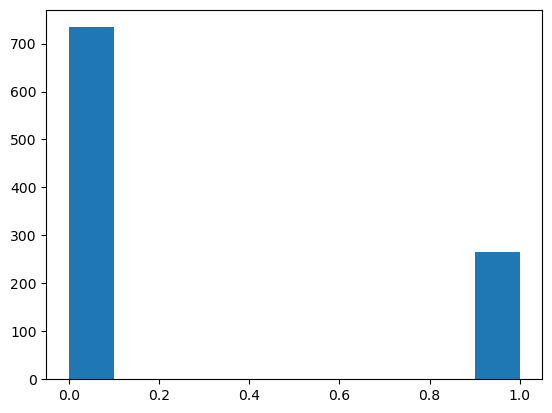

In [151]:
code = []
noise = Variable(torch.randn((1,1000))).cuda()
out = generator(noise)
out = out.cpu().detach().numpy()
for i in out[0]:
    if i > 4:
        code.append(4)
    elif i < 0:
        code.append(0)
    else:
        code.append(np.round(i))
plt.hist(code)

(array([367.,   0.,   0., 179.,   0.,   0., 191.,   0.,   0., 263.]),
 array([0.        , 0.30000001, 0.60000002, 0.89999998, 1.20000005,
        1.5       , 1.79999995, 2.0999999 , 2.4000001 , 2.70000005,
        3.        ]),
 <BarContainer object of 10 artists>)

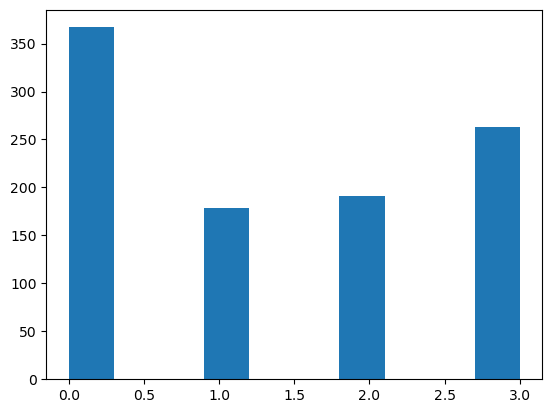

In [ ]:
plt.hist(next(iter(dataloader))[0])

In [ ]:
layer = nn.Linear(100,1)

In [ ]:
noise = torch.randn(1000, 100)
layer(noise).shape

torch.Size([1000, 1])

In [ ]:
class Generator_new(nn.Module):
    def __init__(self,  latent_vars, gen_dim, max_seq_len, annotated=False, res_layers=5):
        super(Generator_new, self).__init__()
        self.input_size = latent_vars.shape
        self.output_size = gen_dim * max_seq_len
        self.seq_len = max_seq_len
        self.gen_dim = gen_dim
        self.res_layer = res_layers
        #self.conv1 = nn.Conv1d(3,6,5,1)
        self.conv1 = nn.Sequential(
                        nn.Conv1d(1,gen_dim,5,1, padding = 'same'),
                        nn.ReLU())
        self.con1 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con2 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con3 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con4 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con5 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.conv2 = nn.Sequential(
                        nn.Conv1d(gen_dim,1,5,1, padding = 'same'),
                        nn.ReLU(),
                        nn.Softmax())
        # self.con_array = [
        #     self.con1,
        #     self.con2,
        #     self.con3,
        #     self.con4,
        #     self.con5,
        # ]
        self.relu = nn.ReLU()
        self.sigmoid = nn.Softmax()#nn.Sigmoid()
        self.linear = nn.Linear(100,1)
        

    def forward(self,x):
        _input = self.conv1(x)#torch.reshape(x,(-1,self.gen_dim,self.seq_len))     
        
        out = self.con1(_input)
        out = self.relu(out)
        out = _input + 0.3 * out
        _input = out

        out = self.con1(_input)
        out = self.relu(out)
        out = _input + 0.3 * out
        _input = out

        out = self.con2(_input)
        out = self.relu(out)
        out = _input + 0.3 * out
        _input = out

        out = self.con3(_input)
        out = self.relu(out)
        out = _input + 0.3 * out
        _input = out

        out = self.con4(_input)
        out = self.relu(out)
        out = _input + 0.3 * out
        _input = out

        out = self.con5(_input)
        out = self.relu(out)
        out = self.sigmoid(_input + 0.3 * out)  
        # for i in range(self.res_layer):
        #     output = self.res_block(_input.float(),i, 0.3)
        #     _input = output
        #output = self.conv2(out)
        output = torch.transpose(out, 0, 1)
        output = self.linear(output) 
        return torch.transpose(output, 0, 1)
    
    def res_block(self,_input, index, downsample = 0):
        res = _input
        out = self.con_array[index](res)
        out = self.relu(out)
        if downsample:
            res = res * downsample
            out = out + res
        return out

        
class Critical_new(nn.Module):
    def __init__(self,  latent_vars, gen_dim, max_seq_len, annotated=False, res_layers=5):
        super(Critical_new, self).__init__()
        self.input_size = latent_vars.shape
        self.output_size = gen_dim * max_seq_len
        self.seq_len = max_seq_len
        self.gen_dim = gen_dim
        self.res_layer = res_layers
        #self.conv1 = nn.Conv1d(3,6,5,1)
        self.conv1 = nn.Conv1d(gen_dim,1,5,1, padding = 'same')
        self.con1 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con2 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con3 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con4 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.con5 = nn.Conv1d(gen_dim ,gen_dim,5,1, padding = 'same')
        self.conv2 = nn.Sequential(
                        nn.Conv1d(1, gen_dim,5,1, padding = 'same'),
                        nn.ReLU())
        # self.con_array = [
        #     self.con1,
        #     self.con2,
        #     self.con3,
        #     self.con4,
        #     self.con5,
        # ]
        self.relu = nn.ReLU()
        # self.sigmoid = nn.Sigmoid()


    def forward(self,x):
        
        _input = x
        out = self.conv2(_input)
        
        out = self.con1(out)
        out = self.relu(out)
        out = _input + 0.3 * out
        _input = out

        out = self.con1(_input)
        out = self.relu(out)
        out = _input + 0.3 * out
        _input = out

        out = self.con2(_input)
        out = self.relu(out)
        out = _input + 0.3 * out
        _input = out

        out = self.con3(_input)
        out = self.relu(out)
        out = _input + 0.3 * out
        _input = out

        out = self.con4(_input)
        out = self.relu(out)
        out = _input + 0.3 * out
        _input = out

        out = self.con5(_input)
        out = self.relu(out)
        out = _input + 0.3 * out
        # for i in range(self.res_layer):
        #     output = self.res_block(_input.float(),i, 0.3)
        #     _input = output
        # #output = torch.reshape(output,(-1,1))

        out = self.conv1(out)
        return out #self.sigmoid(output)
